In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# CorInfoMax

In [3]:
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_CIFAR100_V1.pkl")
print(df_results.shape)
df_results.columns

(1, 7)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list', 'forward_backward_weight_angle_list'],
      dtype='object')

In [8]:
np.array(df_results['Trn_ACC_list'].iloc[0])[:,0]

array([0.02182, 0.03134, 0.0404 ])

In [9]:
df_results['Trn_ACC_list_top1'] = df_results.apply(lambda row: np.array(row['Trn_ACC_list'])[:,0], axis = 1)
df_results['Trn_ACC_list_top5'] = df_results.apply(lambda row: np.array(row['Trn_ACC_list'])[:,1], axis = 1)
df_results['Tst_ACC_list_top1'] = df_results.apply(lambda row: np.array(row['Tst_ACC_list'])[:,0], axis = 1)
df_results['Tst_ACC_list_top5'] = df_results.apply(lambda row: np.array(row['Tst_ACC_list'])[:,1], axis = 1)

df_results['Trn_ACC_top1'] = df_results.apply(lambda row: row['Trn_ACC_list_top1'][-1], axis = 1)
df_results['Trn_ACC_top5'] = df_results.apply(lambda row: row['Trn_ACC_list_top5'][-1], axis = 1)
df_results['Tst_ACC_top1'] = df_results.apply(lambda row: row['Tst_ACC_list_top1'][-1], axis = 1)
df_results['Tst_ACC_top5'] = df_results.apply(lambda row: row['Tst_ACC_list_top5'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,forward_backward_weight_angle_list,Trn_ACC_list_top1,Trn_ACC_list_top5,Tst_ACC_list_top1,Tst_ACC_list_top5,Trn_ACC_top1,Trn_ACC_top5,Tst_ACC_top1,Tst_ACC_top5
0,1,0,CorInfoMax,"{'lr_start': {'ff': [0.15, 0.06, 0.04], 'fb': ...","[[0.02182, 0.08012], [0.03134, 0.1004], [0.040...","[[0.0214, 0.0771], [0.0296, 0.0978], [0.037, 0...","[[90.03692626953125, 89.85530090332031], [90.0...","[0.02182, 0.03134, 0.0404]","[0.08012, 0.1004, 0.12036]","[0.0214, 0.0296, 0.037]","[0.0771, 0.0978, 0.1165]",0.0404,0.12036,0.037,0.1165


In [10]:
df_setting = df_results[['setting_number', 'Trn_ACC_top1', 'Tst_ACC_top1', 'Trn_ACC_top5', 'Tst_ACC_top5']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std_top1', 'Tst_ACC_std_top1', 'Trn_ACC_std_top5', 'Tst_ACC_std_top5']] = df_results[['setting_number', 'Trn_ACC_top1', 'Tst_ACC_top1', 'Trn_ACC_top5', 'Tst_ACC_top5']].groupby('setting_number').std().reset_index()[['Trn_ACC_top1', 'Tst_ACC_top1', 'Trn_ACC_top5', 'Tst_ACC_top5']]
df_setting

,setting_number,Trn_ACC_top1,Tst_ACC_top1,Trn_ACC_top5,Tst_ACC_top5,Trn_ACC_std_top1,Tst_ACC_std_top1,Trn_ACC_std_top5,Tst_ACC_std_top5
0,1,0.0404,0.037,0.12036,0.1165,NaN,NaN,NaN,NaN


In [11]:
best_setting = df_setting.iloc[df_setting['Trn_ACC_top1'].argmax()]['setting_number']
best_setting #= 1

1.0

In [12]:
df_results.loc[df_results['setting_number'] == 1]['Hyperparams'].iloc[0]

{'lr_start': {'ff': array([0.15, 0.06, 0.04]),
  'fb': array([ nan, 0.03, 0.01])},
 'lr_decay_multiplier': 0.95,
 'neural_dynamic_iterations_free': 50,
 'neural_dynamic_iterations_nudged': 20,
 'neural_lr_rule': 'constant',
 'neural_lr': 0.05,
 'epsilon': 0.15,
 'lambda': 0.99999,
 'architecture': [3072, 2000, 1000, 100],
 'three_phase': False}

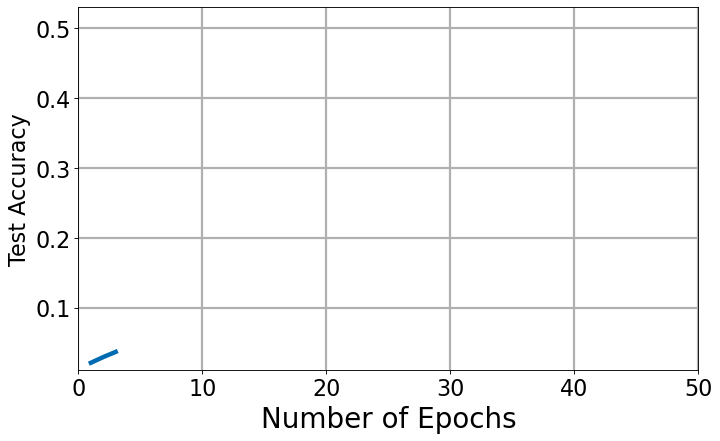

In [14]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list_top1'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# data = np.array(df_results.iloc[0]['Tst_ACC_list'])[np.newaxis]#.apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.53])
ApplyFont(plt.gca())

### Read CorInfoMax Results

In [30]:
# df_results_corinfo = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_CIFAR10.pkl")
# df_results_corinfo['Trn_ACC'] = df_results_corinfo.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
# df_results_corinfo['Tst_ACC'] = df_results_corinfo.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
# df_setting_corinfo = df_results_corinfo[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
# best_setting_corinfo = df_setting_corinfo.iloc[df_setting_corinfo['Trn_ACC'].argmax()]['setting_number']
# best_setting_corinfo  #= 1

# data_corinfo_tst = np.stack(df_results_corinfo.loc[df_results_corinfo["setting_number"] == best_setting_corinfo]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# data_corinfo_trn = np.stack(df_results_corinfo.loc[df_results_corinfo["setting_number"] == best_setting_corinfo]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# # compute the mean, 25/75 percentiles, and standard deviation
# mean_corinfo_tst, perc_25_corinfo_tst, perc_75_corinfo_tst, std_data_corinfo_tst = perc(data_corinfo_tst)
# mean_corinfo_trn, perc_25_corinfo_trn, perc_75_corinfo_trn, std_data_corinfo_trn = perc(data_corinfo_trn)

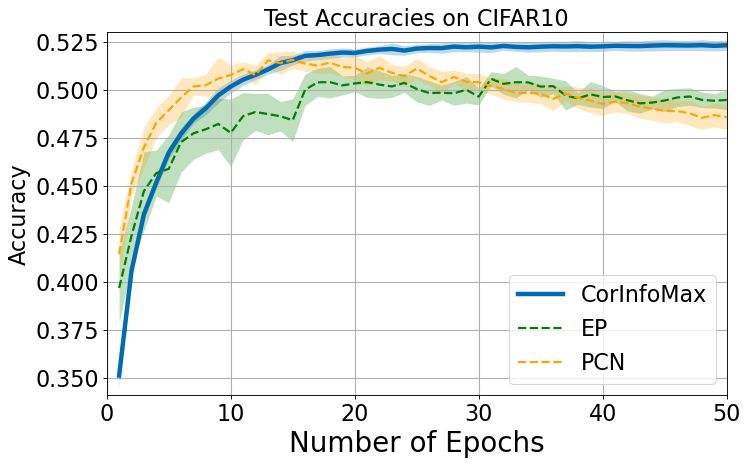

In [31]:
# x = np.arange(1, mean_corinfo_tst.shape[0]+1)
# fh2=plt.figure(figsize=(10, 6), dpi=80)

# plt.plot(x, mean_corinfo_tst, linewidth=4, color='#006BB2', label = "CorInfoMax")
# plt.fill_between(x, mean_corinfo_tst - std_data_corinfo_tst, mean_corinfo_tst + std_data_corinfo_tst, alpha=0.25, linewidth=0, color='#006BB2')

# # plt.plot(x, mean_csm_tst, 'r--', linewidth=4, label = "CSM")
# # plt.fill_between(x, mean_csm_tst - std_data_csm_tst, mean_csm_tst + std_data_csm_tst, color = 'red', alpha=0.25, linewidth=0)

# plt.plot(x, mean_ep_tst, 'g--', linewidth=2, label = "EP")
# plt.fill_between(x, mean_ep_tst - std_data_ep_tst, mean_ep_tst + std_data_ep_tst, color = 'green', alpha=0.25, linewidth=0)

# # plt.plot(x, mean_pc_tst, 'b--', linewidth=4, label = "PC")
# # plt.fill_between(x, mean_pc_tst - std_data_pc_tst, mean_pc_tst + std_data_pc_tst, color = 'blue', alpha=0.25, linewidth=0)

# plt.plot(x, mean_pcn_tst, '--', color = "orange", linewidth=2, label = "PCN")
# plt.fill_between(x, mean_pcn_tst - std_data_pcn_tst, mean_pcn_tst + std_data_pcn_tst, color = 'orange', alpha=0.25, linewidth=0)


# gh=plt.grid(linewidth=1)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('Accuracy',fontsize=25)
# plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("Test Accuracies on CIFAR10",fontsize=25)
# plt.legend(fontsize = 20, loc = "best")
# plt.axis([0.0,50,mean_corinfo_tst[0] - 0.01,0.53])
# ApplyFont(plt.gca())
# plt.savefig('Figures/CorInfoMaxCIFAR10TestAccuracyComparison.pdf', format='pdf')

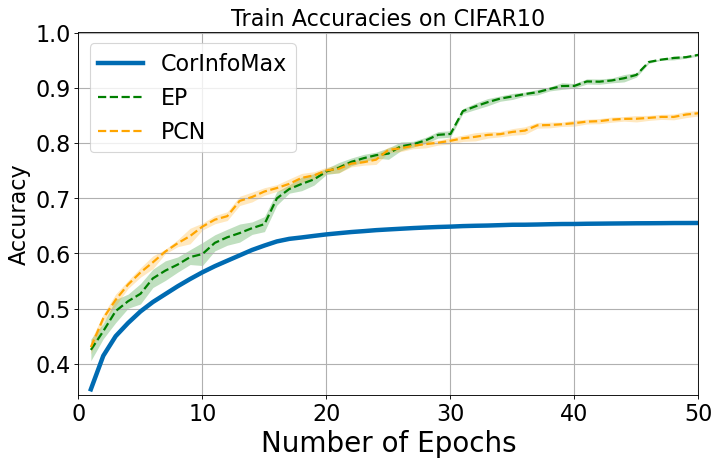

In [32]:
# x = np.arange(1, mean_corinfo_trn.shape[0]+1)
# fh2=plt.figure(figsize=(10, 6), dpi=80)

# plt.plot(x, mean_corinfo_trn, linewidth=4, color='#006BB2', label = "CorInfoMax")
# plt.fill_between(x, mean_corinfo_trn - std_data_corinfo_trn, mean_corinfo_trn + std_data_corinfo_trn, alpha=0.25, linewidth=0, color='#006BB2')

# # plt.plot(x, mean_csm_trn, 'r--', linewidth=4, label = "CSM")
# # plt.fill_between(x, mean_csm_trn - std_data_csm_trn, mean_csm_trn + std_data_csm_trn, color = 'red', alpha=0.25, linewidth=0)

# plt.plot(x, mean_ep_trn, 'g--', linewidth=2, label = "EP")
# plt.fill_between(x, mean_ep_trn - std_data_ep_trn, mean_ep_trn + std_data_ep_trn, color = 'green', alpha=0.25, linewidth=0)

# # plt.plot(x, mean_pc_trn, 'b--', linewidth=4, label = "PC")
# # plt.fill_between(x, mean_pc_trn - std_data_pc_trn, mean_pc_trn + std_data_pc_trn, color = 'blue', alpha=0.25, linewidth=0)

# plt.plot(x, mean_pcn_trn, '--', color = "orange", linewidth=2, label = "PCN")
# plt.fill_between(x, mean_pcn_trn - std_data_pcn_trn, mean_pcn_trn + std_data_pcn_trn, color = 'orange', alpha=0.25, linewidth=0)


# gh=plt.grid(linewidth=1)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('Accuracy',fontsize=25)
# plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("Train Accuracies on CIFAR10",fontsize=25)
# plt.legend(fontsize = 20, loc = "best")
# plt.axis([0.0,50,mean_corinfo_trn[0] - 0.01,1.001])
# ApplyFont(plt.gca())
# plt.savefig('Figures/CorInfoMaxCIFAR10TrainAccuracyComparison.pdf', format='pdf')